In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
Retrieve the data and explore it.

Working with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

Avg. Session Length: Average session of in-store style advice sessions. Time on App: Average time spent on App in minutes Time on Website: Average time spent on Website in minutes Length of Membership: How many years the customer has been a member. ** Reading in the Ecommerce Customers csv file as a DataFrame.**

In [2]:
df = pd.read_csv('Data/Ecommerce Customers.csv')

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


- mean : Average value
- std : Standard Deviation
    - The standard deviation is the average amount of variability in your dataset. It tells you, on average, how far each value lies from the mean. A high standard deviation means that values are generally far from the mean, while a low standard deviation indicates that values are clustered close to the mean
- min : minimum
- 25%, 50%, 75%: Median
- max: maximum

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis
<b>Let's explore the data!

<b>Using seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?


In [6]:
sns.set(style="ticks")

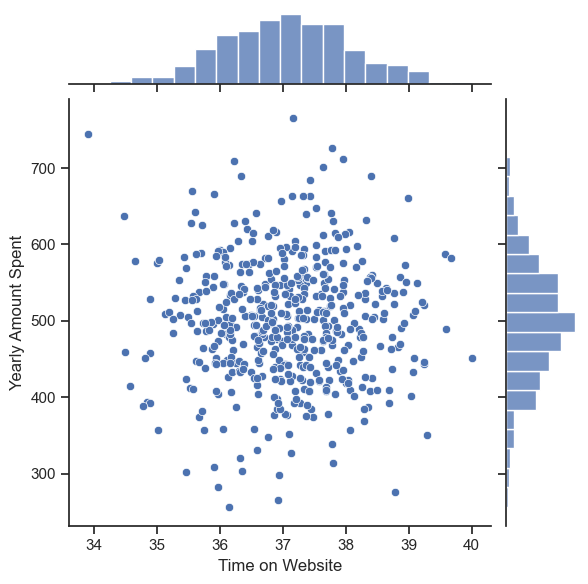

In [7]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df,kind='scatter')

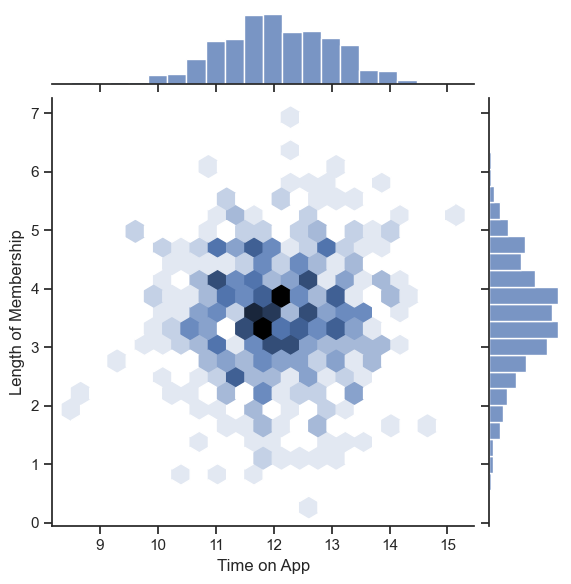

In [8]:
sns.jointplot(x='Time on App',y='Length of Membership',data=df,kind='hex')

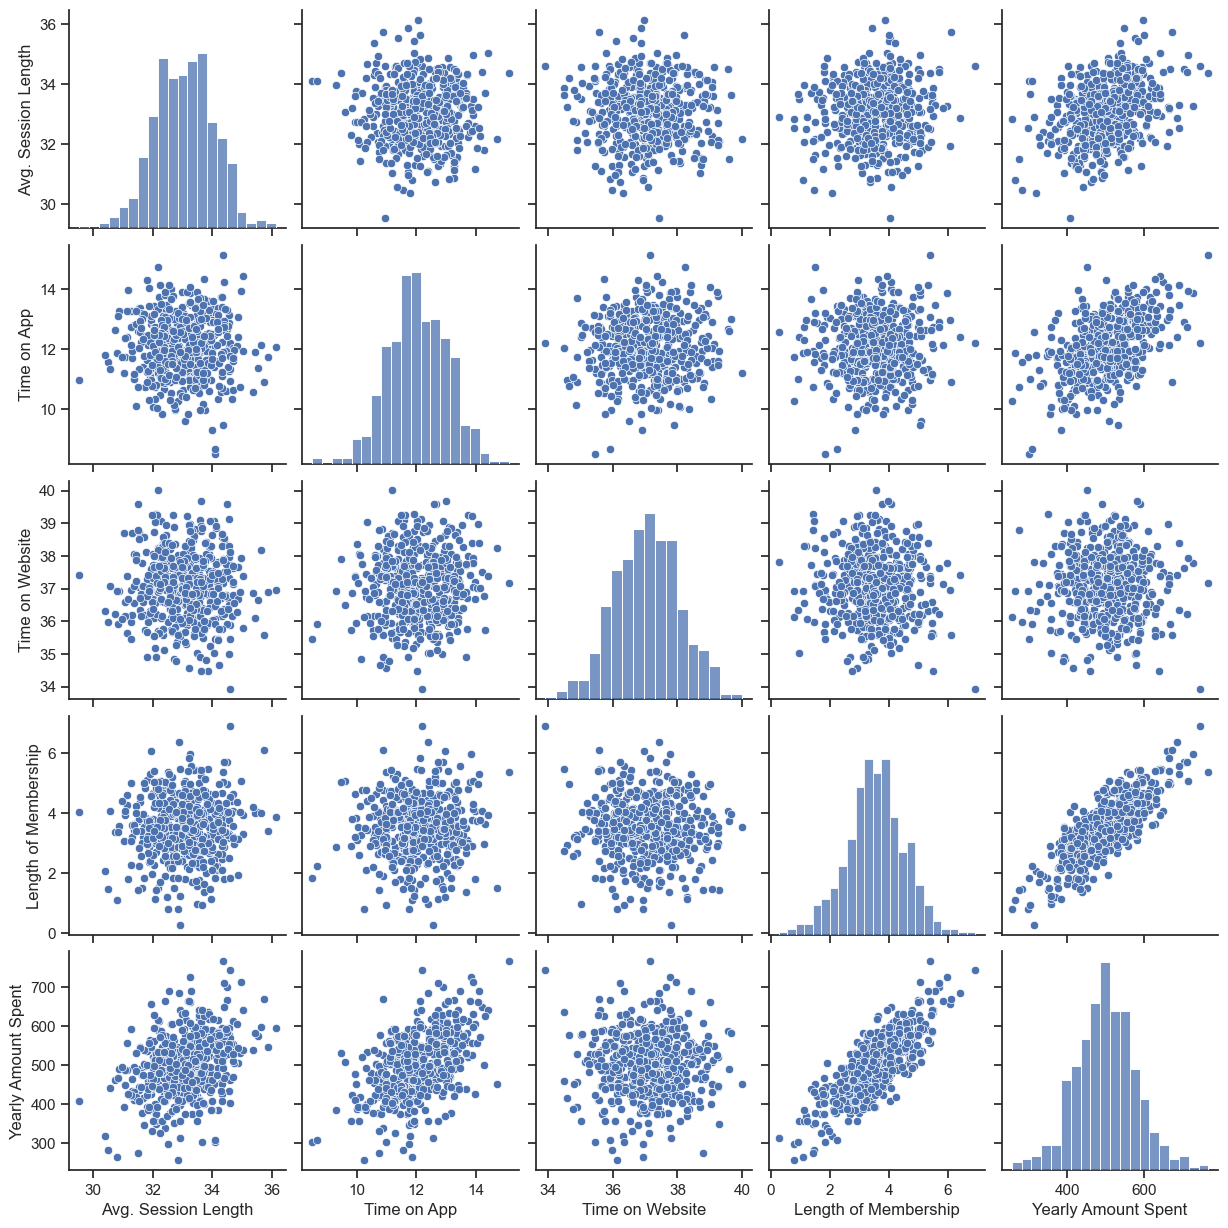

In [9]:
sns.pairplot(df)

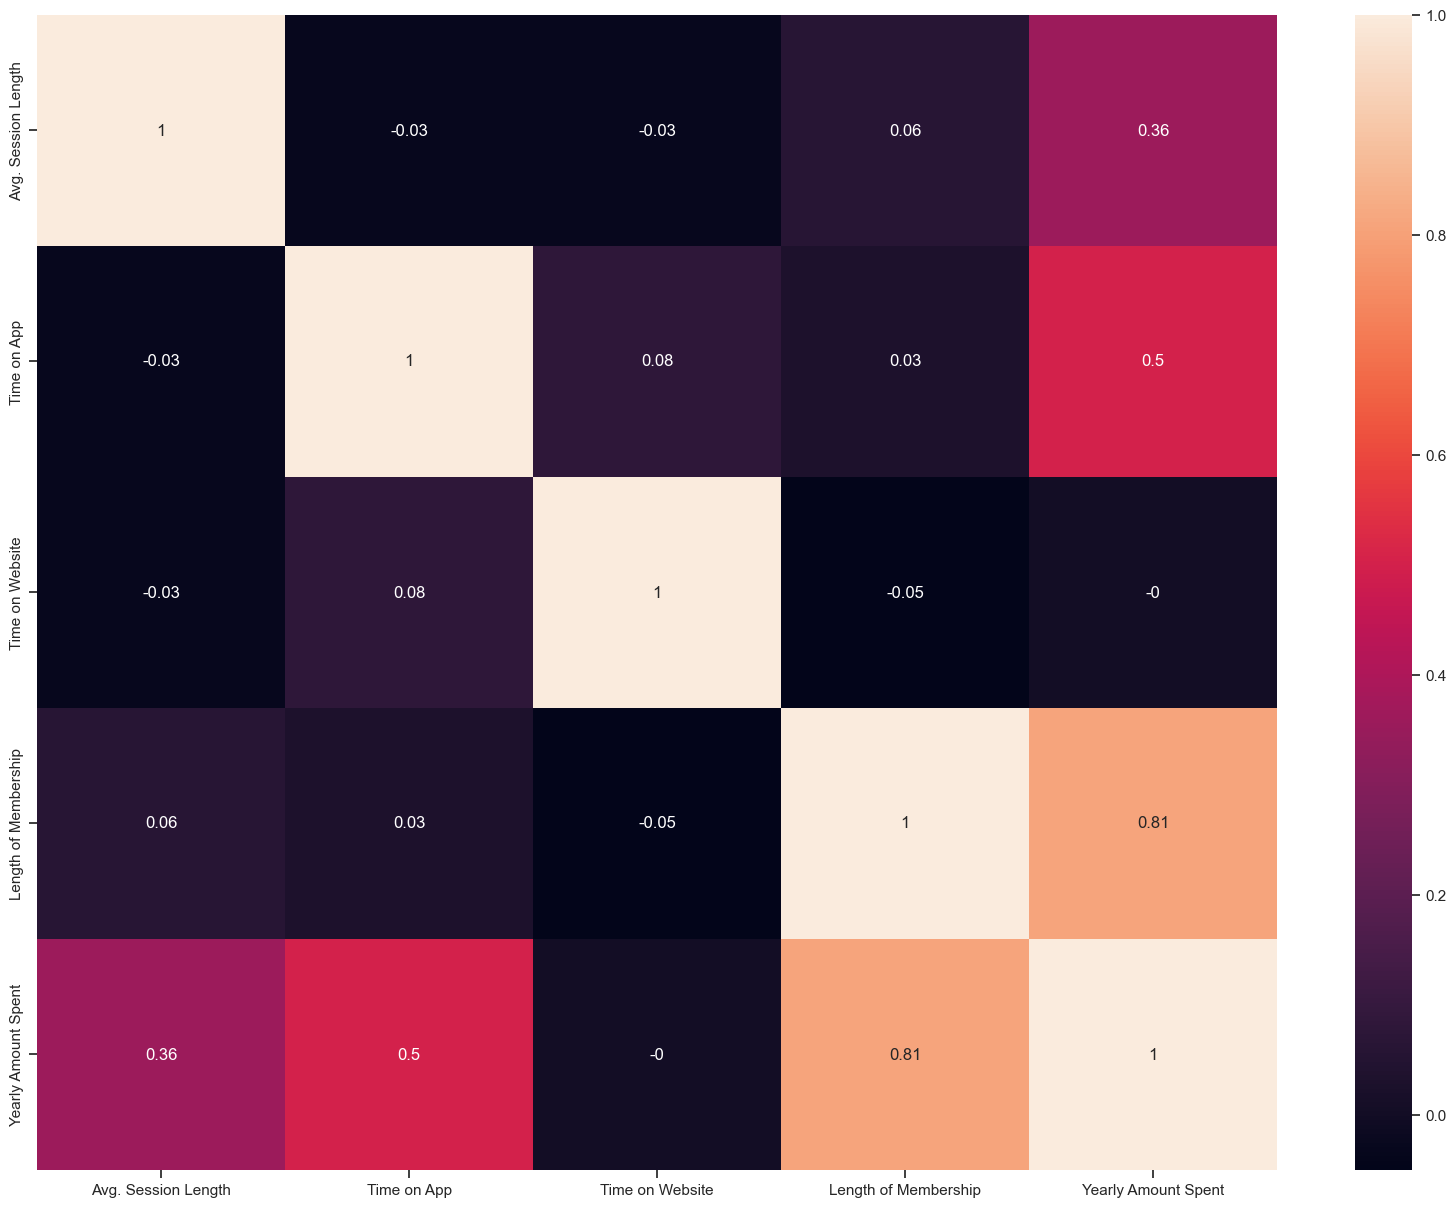

In [12]:
df_corr = df[['Avg. Session Length', 'Time on App',
              'Time on Website', 'Length of Membership', 'Yearly Amount Spent']]
correlation_matrix = df_corr.corr().round(2)
plt.subplots(figsize=(20,15))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

<b>Creating a linear model plot (using seaborn's lmplot) of Yearly Amount Spent vs. Length of Membership.


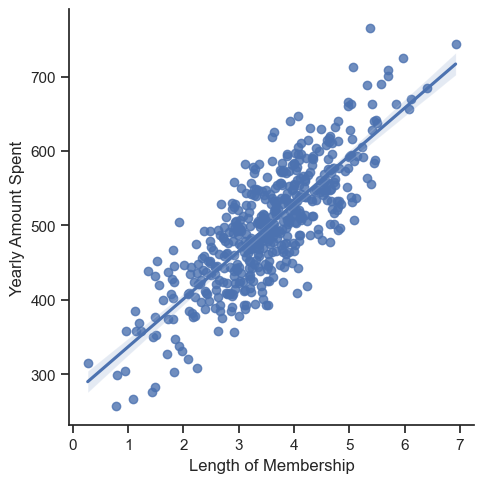

In [14]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df)

### Training and Testing Data

In [16]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [17]:
X=df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership' ]]

In [18]:
Y=df['Yearly Amount Spent']

** Using model_selection.train_test_split from sklearn to split the data into training and testing sets. **


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

### Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [21]:
from sklearn.linear_model import LinearRegression

<b>Creating an instance of a LinearRegression() model named lm.

In [22]:
lm=LinearRegression()

** Train/fit lm on the training data.**



In [34]:
lm.fit(X_train,y_train)
# LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression()

In [24]:
coeff_df=pd.DataFrame(lm.coef_,X.columns,columns=['Coefficients'])
coeff_df

,Coefficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


### Predicting Test Data

Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Using lm.predict() to predict off the X_test set of the data.**

In [25]:
predictions=lm.predict(X_test)

** Creating a scatterplot of the real test values versus the predicted values. **



In [35]:
print("预测值为:\n", predictions)
print("模型中的系数为:\n", lm.coef_)
print("模型中的偏置为:\n", lm.intercept_)

预测值为:
 [456.44186104 402.72005312 409.2531539  591.4310343  590.01437275
 548.82396607 577.59737969 715.44428115 473.7893446  545.9211364
 337.8580314  500.38506697 552.93478041 409.6038964  765.52590754
 545.83973731 693.25969124 507.32416226 573.10533175 573.2076631
 397.44989709 555.0985107  458.19868141 482.66899911 559.2655959
 413.00946082 532.25727408 377.65464817 535.0209653  447.80070905
 595.54339577 667.14347072 511.96042791 573.30433971 505.02260887
 565.30254655 460.38785393 449.74727868 422.87193429 456.55615271
 598.10493696 449.64517443 615.34948995 511.88078685 504.37568058
 515.95249276 568.64597718 551.61444684 356.5552241  464.9759817
 481.66007708 534.2220025  256.28674001 505.30810714 520.01844434
 315.0298707  501.98080155 387.03842642 472.97419543 432.8704675
 539.79082198 590.03070739 752.86997652 558.27858232 523.71988382
 431.77690078 425.38411902 518.75571466 641.9667215  481.84855126
 549.69830187 380.93738919 555.18178277 403.43054276 472.52458887
 501.829

Text(0, 0.5, 'Y_predicted')

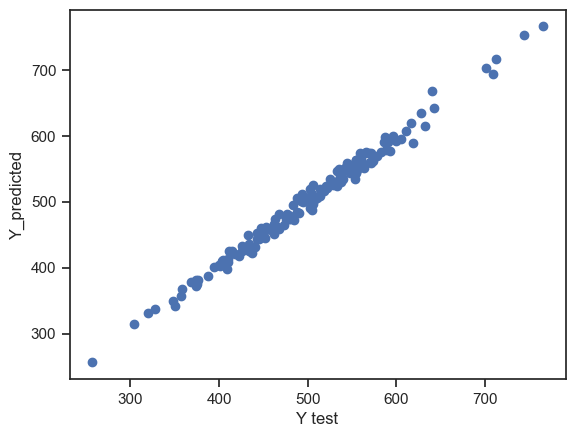

In [26]:
plt.scatter(y_test,predictions)
plt.xlabel('Y test')
plt.ylabel('Y_predicted')

### Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculating the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. **


In [27]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430815
MSE: 79.81305165097409
RMSE: 8.933815066978614


#### 'MAE': Mean absolute error
In statistics, mean absolute error is a measure of errors between paired observations expressing the same phenomenon. Examples of Y versus X include comparisons of predicted versus observed, subsequent time versus initial time, and one technique of measurement versus an alternative technique of measurement

#### MSE
Mean Squared Error (MSE) is defined as Mean or Average of the square of the difference between actual and estimated values

#### RMSE
The root mean square error (RMSE) measures the average difference between a statistical model's predicted values and the actual values. Mathematically, it is the standard deviation of the residuals. Residuals represent the distance between the regression line and the data points

In [28]:
### Residuals

<b>Ploting a histogram of the residuals and making sure it looks normally distributed.


/var/folders/n4/p1mk_zq17qx2d9y2p5ffshlr0000gn/T/ipykernel_87005/1626343738.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


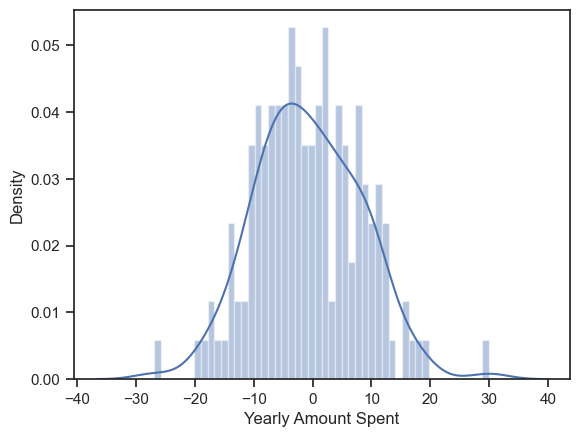

In [31]:
sns.distplot((y_test-predictions),bins=50);

<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

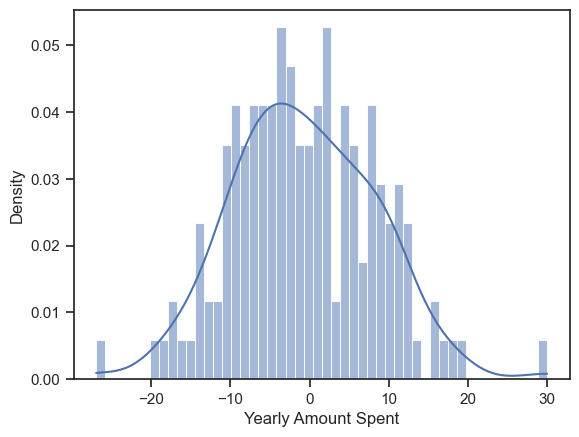

In [32]:
#sns.histplot((y_test-predictions),bins=50);
sns.histplot(y_test-predictions, kde=True, bins=50, stat="density")

Text(0, 0.5, 'Spent')

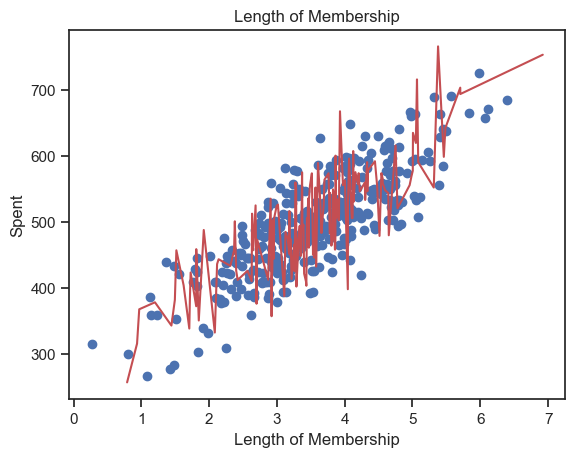

In [37]:
plt.scatter(X_train['Length of Membership'], y_train, marker='o')
plt.plot(np.sort(X_test['Length of Membership']), predictions[np.argsort(X_test['Length of Membership'])], color = 'r')
plt.title('Length of Membership')
plt.xlabel('Length of Membership')
plt.ylabel('Spent')